## Description

In this time series analysis, I'll employ time-series forecasting techniques to predict store sales using data from Corporación Favorita, a major grocery retailer based in Ecuador.

The goal is to construct a model that enhances the accuracy of predicting unit sales for numerous items across various Favorita stores. This project serves as a practical application to hone machine learning skills, utilizing a user-friendly training dataset encompassing dates, store details, item information, promotions, and unit sales.


In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load your time series data 
data = pd.read_csv('train.csv')

In [61]:
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [62]:
data.shape

(3000888, 6)

In [63]:
# Assuming your data has a 'date' column, convert it to datetime format
data['date'] = pd.to_datetime(data['date'])

In [66]:
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


<AxesSubplot:xlabel='sales', ylabel='Count'>

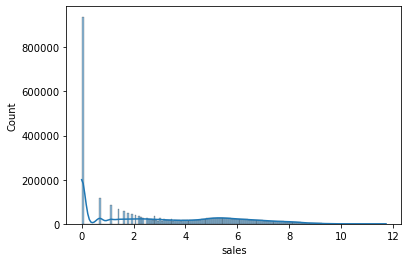

In [67]:
#Make sales visualizations for better understanding
sns.histplot(np.log1p(data['sales']), kde=True)

Text(0.5, 1.0, 'Monthly sales by store number 2013-2018')

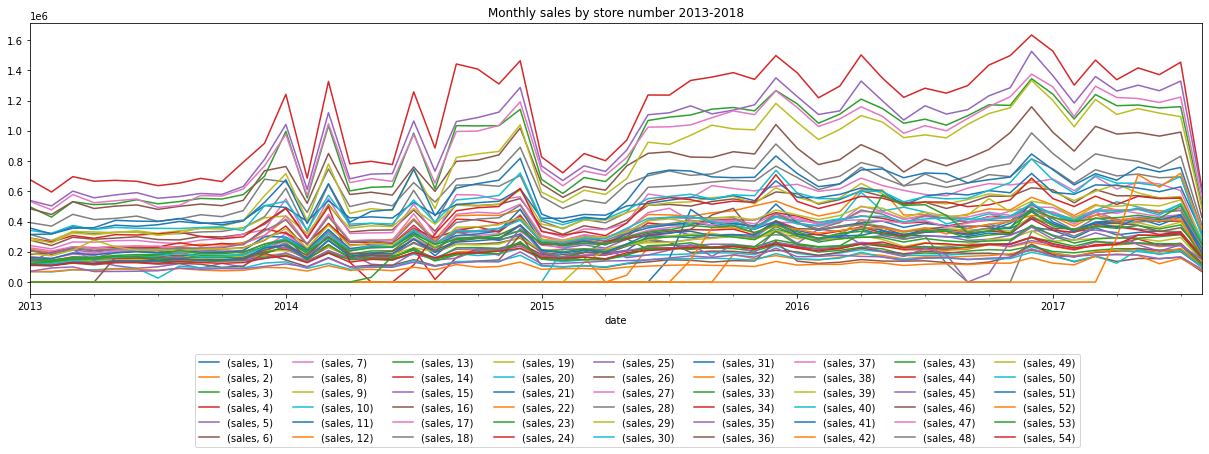

In [68]:
# Make sales visualization by monthly sales according to store_nbr
store_sales_month = data.groupby(['date', 'store_nbr']).agg({'sales': 'sum'}).unstack().resample('1M').sum()
store_sales_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.9, -0.2), ncol=9)
plt.title("Monthly sales by store number 2013-2018")

Text(0.5, 1.0, 'Monthly sales by family')

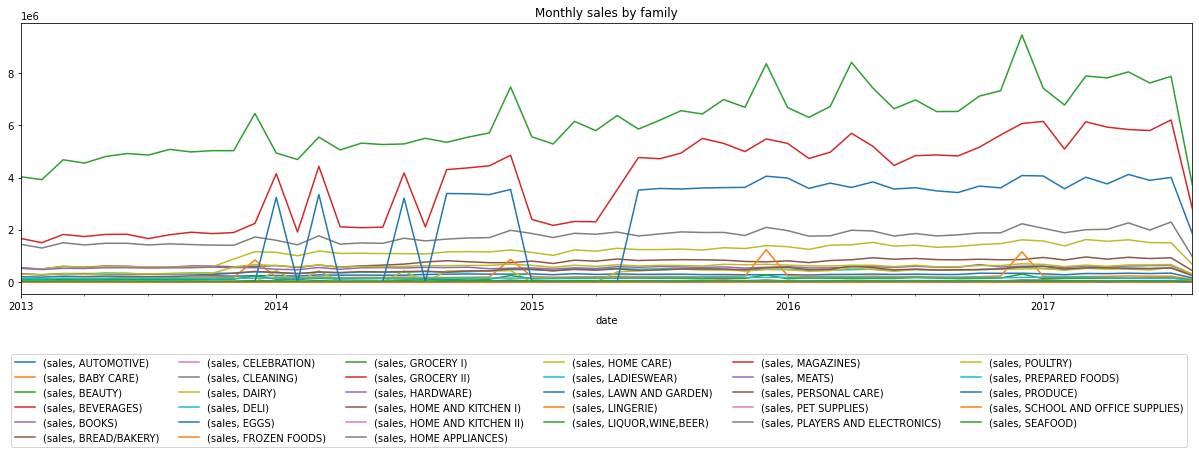

In [69]:
# Make sales visualization by family
family_sales_month = data.groupby(['date', 'family']).agg({'sales': 'sum'}).unstack().resample('1M').sum()
family_sales_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(1, -.2), ncol=6)
plt.title("Monthly sales by family")

<AxesSubplot:xlabel='onpromotion', ylabel='Count'>

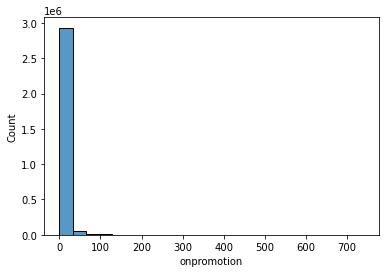

In [70]:
# Promotion hist visualization
sns.histplot(data=data, x='onpromotion')

In [71]:
# Transform cathegorical Family column to numerical
data_dummies = pd.get_dummies(data['family'])

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical column if needed
data = data.drop('family', axis=1)

In [72]:
data.head()

,id,date,store_nbr,sales,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,0,2013-01-01,1,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2013-01-01,1,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2013-01-01,1,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2013-01-01,1,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013-01-01,1,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'AUTOMOTIVE',
       'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
       'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS',
       'GROCERY I', 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I',
       'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR',
       'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS',
       'PERSONAL CARE', 'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'],
      dtype='object')

In [76]:
# Create features and target variable
features = list(set('store_nbr', 'sales', 'onpromotion', 'AUTOMOTIVE',
       'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
       'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS',
       'GROCERY I', 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I',
       'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR',
       'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS',
       'PERSONAL CARE', 'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD')  
target = 'sales'

SyntaxError: invalid syntax (<ipython-input-76-5a23c3b1b45e>, line 10)

In [46]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)  # Assuming time-based split


In [47]:
# Initialize different regression models
linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()

In [48]:
# Train each model
linear_reg_model.fit(train_data[features], train_data[target])
random_forest_model.fit(train_data[features], train_data[target])
gradient_boosting_model.fit(train_data[features], train_data[target])

GradientBoostingRegressor()

In [49]:
# Make predictions using each model
linear_reg_predictions = linear_reg_model.predict(test_data[features])
random_forest_predictions = random_forest_model.predict(test_data[features])
gradient_boosting_predictions = gradient_boosting_model.predict(test_data[features])

In [50]:
# Evaluate the performance of each model
linear_reg_mae = mean_absolute_error(test_data[target], linear_reg_predictions)
random_forest_mae = mean_absolute_error(test_data[target], random_forest_predictions)
gradient_boosting_mae = mean_absolute_error(test_data[target], gradient_boosting_predictions)

In [51]:
# Display the results
print(f'Linear Regression MAE: {linear_reg_mae}')
print(f'Random Forest MAE: {random_forest_mae}')
print(f'Gradient Boosting MAE: {gradient_boosting_mae}')

Linear Regression MAE: 273.07425112576595
Random Forest MAE: 133.55046385899163
Gradient Boosting MAE: 248.02568559171422


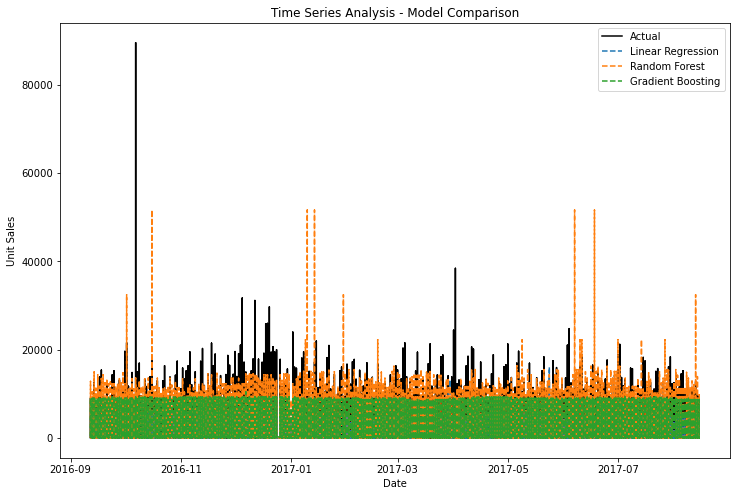

In [52]:
# Visualize the predictions of each model against the actual values
plt.figure(figsize=(12, 8))

# Plot actual values
plt.plot(test_data['date'], test_data[target], label='Actual', color='black')

# Plot Linear Regression predictions
plt.plot(test_data['date'], linear_reg_predictions, label='Linear Regression', linestyle='dashed')

# Plot Random Forest predictions
plt.plot(test_data['date'], random_forest_predictions, label='Random Forest', linestyle='dashed')

# Plot Gradient Boosting predictions
plt.plot(test_data['date'], gradient_boosting_predictions, label='Gradient Boosting', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.title('Time Series Analysis - Model Comparison')
plt.legend()
plt.show()